## Statistical Coverage Product viewer

This notebook makes timeseries plots of Peter May's Statistical Coverage Product as generated by derive_scp.py

In [1]:
from netCDF4 import Dataset
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import dates
import numpy as np
%matplotlib inline

Input data path

In [4]:
scp_netcdf_file_path = '/home/rjackson/data/SCP_Houston2014.cdf'

start_time = datetime(2010,1,13,12,0,0)
end_time = datetime(2010,1,15,1,0,0)

Load netCDF variables

In [5]:
scp_netcdf = Dataset(scp_netcdf_file_path, mode='r')
print(scp_netcdf.variables)
SCP = scp_netcdf.variables['SCP'][:]
time = scp_netcdf.variables['time'][:]
z = scp_netcdf.variables['z'][:]
reference_time = 
scp_netcdf.close()

OrderedDict([('SCP', <class 'netCDF4._netCDF4.Variable'>
float64 SCP(time, reflectivity, z)
    _FillValue: nan
unlimited dimensions: 
current shape = (312, 8, 31)
filling on), ('time', <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    _FillValue: nan
    units: seconds since 2014-07-31 15:12:46.748000
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (312,)
filling on), ('z', <class 'netCDF4._netCDF4.Variable'>
float64 z(z)
    _FillValue: nan
unlimited dimensions: 
current shape = (31,)
filling on), ('reference_time', <class 'netCDF4._netCDF4.Variable'>
int64 reference_time()
    units: days since 2014-01-03 04:04:16.229000
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -9223372036854775806 used
), ('reflectivity', <class 'netCDF4._netCDF4.Variable'>
int64 reflectivity(reflectivity)
unlimited dimensions: 
current shape = (8,)
filling on, default _FillValue of -9223372036854775806 used
)])


KeyError: 'years'

Display statistical coverage product

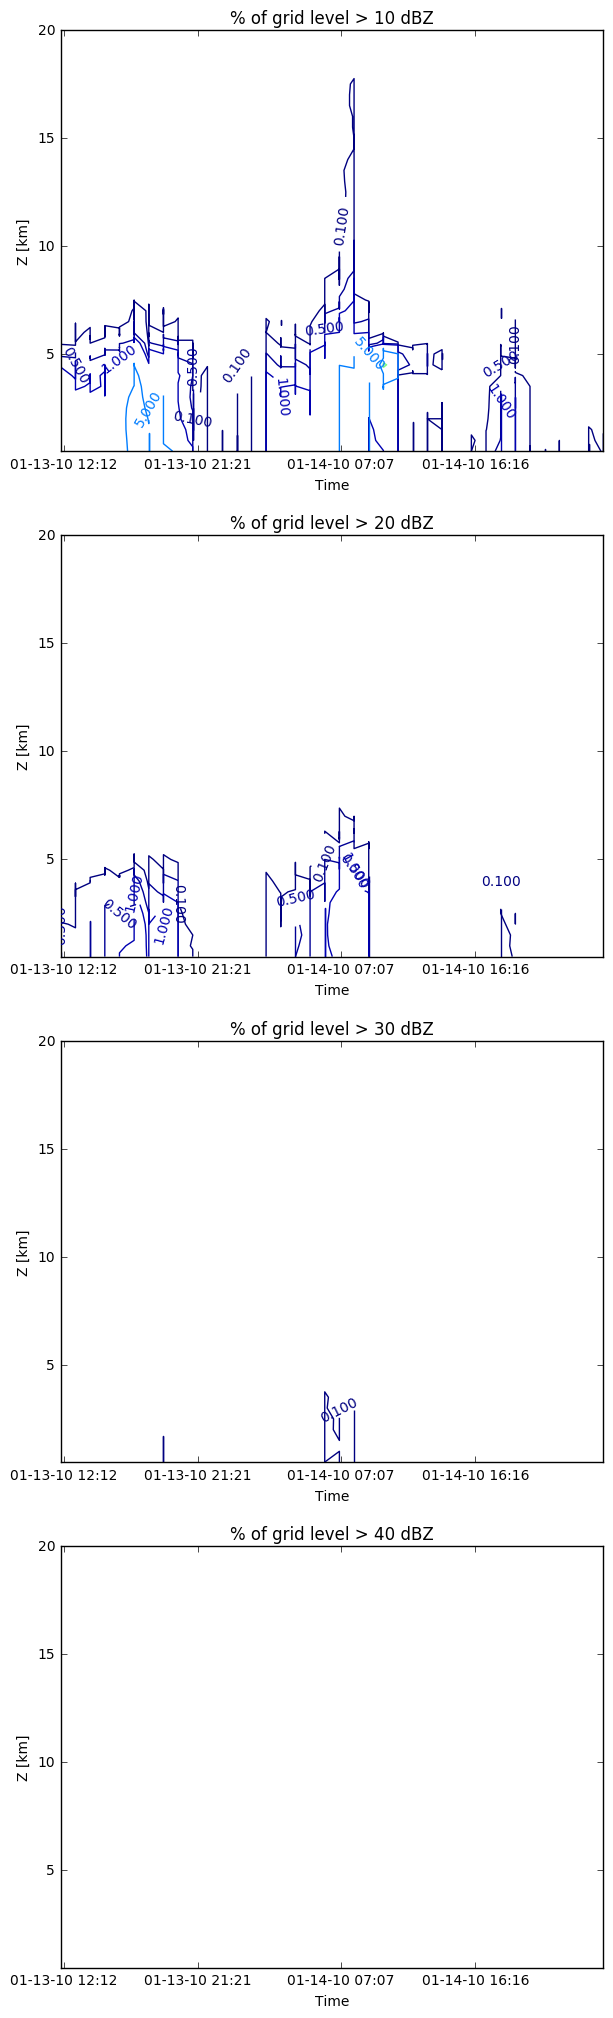

In [7]:
# Convert times to numerical format
datenums = []
indicies = []
for i in range(0,len(years)):
    temp_date = datetime(year=years[i],
                         month=months[i],
                         day=days[i],
                         hour=hours[i],
                         minute=minutes[i],
                         )
    datenums.append(dates.date2num(temp_date))   

datenums = np.array(datenums)
indicies = [True if b >= dates.date2num(start_time) 
                 and b <= dates.date2num(end_time) else False for b in datenums]

datenums = datenums[np.where(indicies)]
years_z = years[np.where(indicies)]
months_z = months[np.where(indicies)]
days_z = days[np.where(indicies)]
hours_z = hours[np.where(indicies)]
minutes_z = hours[np.where(indicies)]
SCP0z = np.squeeze(SCP0[np.where(indicies),:])
SCP10z = np.squeeze(SCP10[np.where(indicies),:])
SCP20z = np.squeeze(SCP20[np.where(indicies),:])
SCP30z = np.squeeze(SCP30[np.where(indicies),:])
SCP40z = np.squeeze(SCP40[np.where(indicies),:])

num_dates = len(datenums)

datelocs = []
for i in range(0, num_dates, int(num_dates/4)):
    temp_date = datetime(year=years_z[i],
                         month=months_z[i],
                         day=days_z[i],
                         hour=hours_z[i],
                         minute=minutes_z[i],
                         )
    datelocs.append(temp_date)
x = dates.date2num(datelocs)    

# Create meshgrid for contour plot
times, lvls = np.meshgrid(datenums,levels)

contour_levels = [0.1, 0.5, 1, 5, 10,20]
# Plot contour figure
plt.figure(figsize=(7,25))

plt.subplot(411)
CS = plt.contour(times,lvls,np.transpose(SCP10z), levels=contour_levels)
plt.gca().set_xticks(x)
plt.clabel(CS, inline=1, fontsize=10)
# Set the xtick labels to correspond to just the dates you entered.
plt.gca().set_xticklabels([date.strftime("%m-%d-%y %H:%M") for date in datelocs])
plt.ylabel('Z [km]')
plt.xlabel('Time')
plt.title('% of grid level > 10 dBZ')

plt.subplot(412)
CS = plt.contour(times,lvls,np.transpose(SCP20z), levels=contour_levels)
plt.gca().set_xticks(x)
plt.clabel(CS, inline=1, fontsize=10)
# Set the xtick labels to correspond to just the dates you entered.
plt.gca().set_xticklabels([date.strftime("%m-%d-%y %H:%M") for date in datelocs])
plt.ylabel('Z [km]')
plt.xlabel('Time')
plt.title('% of grid level > 20 dBZ')

plt.subplot(413)
CS = plt.contour(times,lvls,np.transpose(SCP30z), levels=contour_levels)
plt.gca().set_xticks(x)
plt.clabel(CS, inline=1, fontsize=10)
# Set the xtick labels to correspond to just the dates you entered.
plt.gca().set_xticklabels([date.strftime("%m-%d-%y %H:%M") for date in datelocs])

plt.ylabel('Z [km]')
plt.xlabel('Time')
plt.title('% of grid level > 30 dBZ')

plt.subplot(414)
CS = plt.contour(times,lvls,np.transpose(SCP40z), levels=contour_levels)
plt.gca().set_xticks(x)
plt.clabel(CS, inline=1, fontsize=10)
# Set the xtick labels to correspond to just the dates you entered.
plt.gca().set_xticklabels([date.strftime("%m-%d-%y %H:%M") for date in datelocs])
plt.ylabel('Z [km]')
plt.xlabel('Time')
plt.title('% of grid level > 40 dBZ')

## Classify time periods into categories

Try to identify five modes: clear air, shallow convection, congestus, deep, stratiform

In [8]:
# Find max height where SCP10 > 0
max_z = np.ma.zeros(len(years))
for i in range(0,len(years)):
    indicies = np.where(SCP10[i,:] > 0)
    if(len(indicies) > 0):
        print(indicies)
        max_z[i] = levels[indicies[-1]]
    else:
        max_z[i].mask = True
    
bins, centers = np.histogram(max_z)
plt.figure
plt.plot(bins,centers)

(array([], dtype=int64),)


ValueError: setting an array element with a sequence.

In [ ]:
plt.figure
print(SCP10.shape)
number = np.where(SCP20[:,2] > 0.1)
print('# of interesting scans:' + str(number[0].size))

In [ ]:
plt.plot(seconds)